In [2]:
import glob
import geopandas as gpd
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import rasterio
from rasterio.plot import show
import numpy as np

In [3]:
with open('C:/repos/satellite-images-nso/postprocessing/no_clouds_schippers_gat.pkl', 'rb') as f:
    no_clouds_schippergat = pickle.load(f)
print(no_clouds_schippergat)

['E:/data/nieuwkoopse_plassen_schippersgat\\20120322_102446_Form_200cm_RD_8bit_RGB_Breukelen_str01_01_Schippersgat_cropped.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20120331_102440_Form_200cm_RD_8bit_RGBI_Breukelen_Schippersgat_cropped.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20120418_102429_Form_200cm_RD_8bit_RGBI_Breukelen_Schippersgat_cropped.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20120506_102424_Form_200cm_RD_8bit_RGBI_Loenen_Schippersgat_cropped.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20120515_102411_Form_200cm_RD_8bit_RGBI_Woerden_Schippersgat_cropped.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20190302_113613_SV1-02_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20190409_111030_SV1-04_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif', 'E:/data/nieuwkoopse_plassen_schippersgat\\20190416_113410_SV1-02_50cm_RD_11bit_RGBI_Nieuwveen_Schippersgat_cropped_ndwi_re_nd

In [4]:
no_clouds_schippergat = [path.replace("\\", "/") for path in no_clouds_schippergat if "2012" not in path]

In [5]:
no_clouds_schippergat

['E:/data/nieuwkoopse_plassen_schippersgat/20190302_113613_SV1-02_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif',
 'E:/data/nieuwkoopse_plassen_schippersgat/20190409_111030_SV1-04_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif',
 'E:/data/nieuwkoopse_plassen_schippersgat/20190416_113410_SV1-02_50cm_RD_11bit_RGBI_Nieuwveen_Schippersgat_cropped_ndwi_re_ndvi.tif',
 'E:/data/nieuwkoopse_plassen_schippersgat/20190523_105729_SV1-01_50cm_RD_11bit_RGBI_VinkeveensePlassen_Schippersgat_cropped_ndwi_re_ndvi.tif',
 'E:/data/nieuwkoopse_plassen_schippersgat/20190523_111841_SV1-04_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif',
 'E:/data/nieuwkoopse_plassen_schippersgat/20190629_113712_SV1-02_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif',
 'E:/data/nieuwkoopse_plassen_schippersgat/20190826_111247_SV1-01_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif',
 'E:/data/nieuwkoopse_plassen_schippersgat/202

E:/data/nieuwkoopse_plassen_schippersgat/20190302_113613_SV1-02_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif


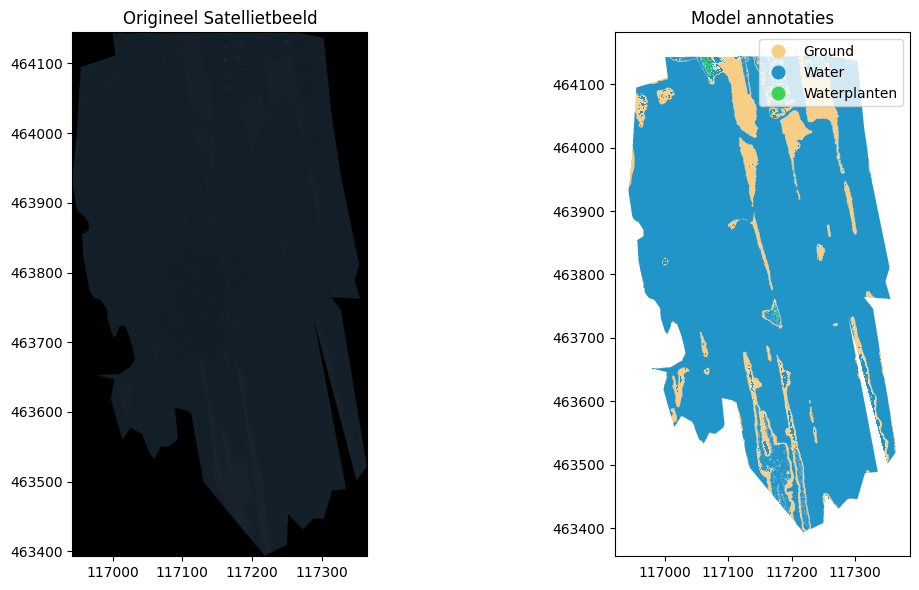

E:/data/nieuwkoopse_plassen_schippersgat/20190409_111030_SV1-04_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif


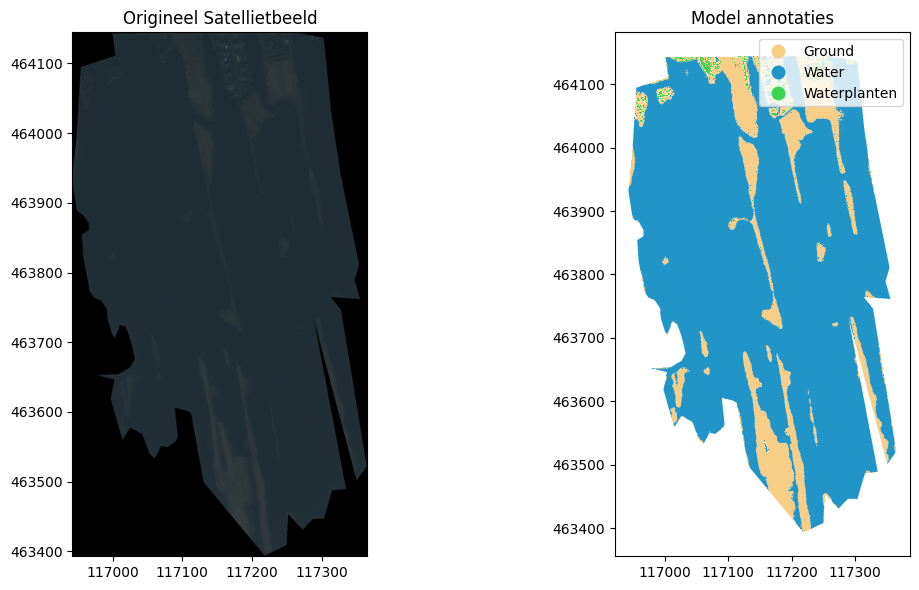

E:/data/nieuwkoopse_plassen_schippersgat/20190416_113410_SV1-02_50cm_RD_11bit_RGBI_Nieuwveen_Schippersgat_cropped_ndwi_re_ndvi.tif


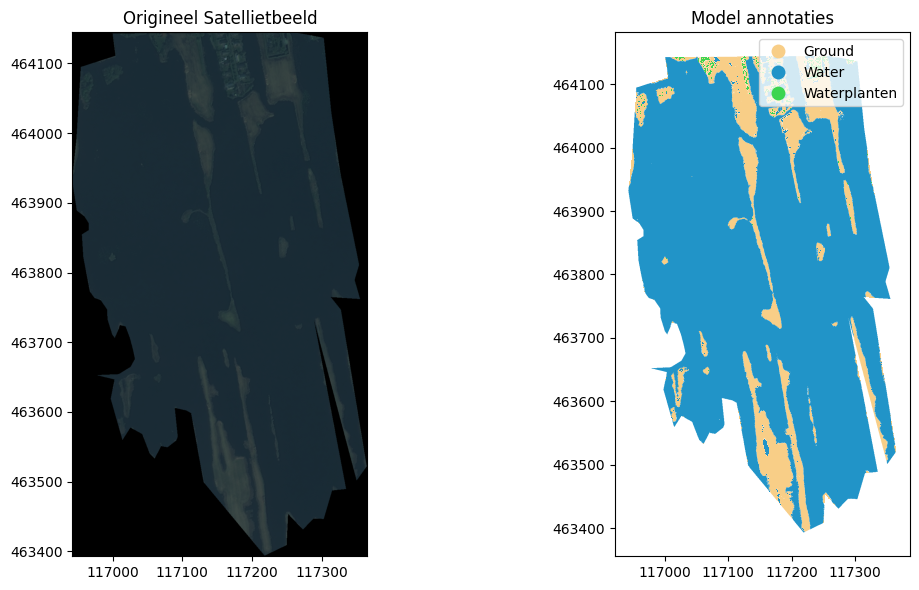

E:/data/nieuwkoopse_plassen_schippersgat/20190523_105729_SV1-01_50cm_RD_11bit_RGBI_VinkeveensePlassen_Schippersgat_cropped_ndwi_re_ndvi.tif


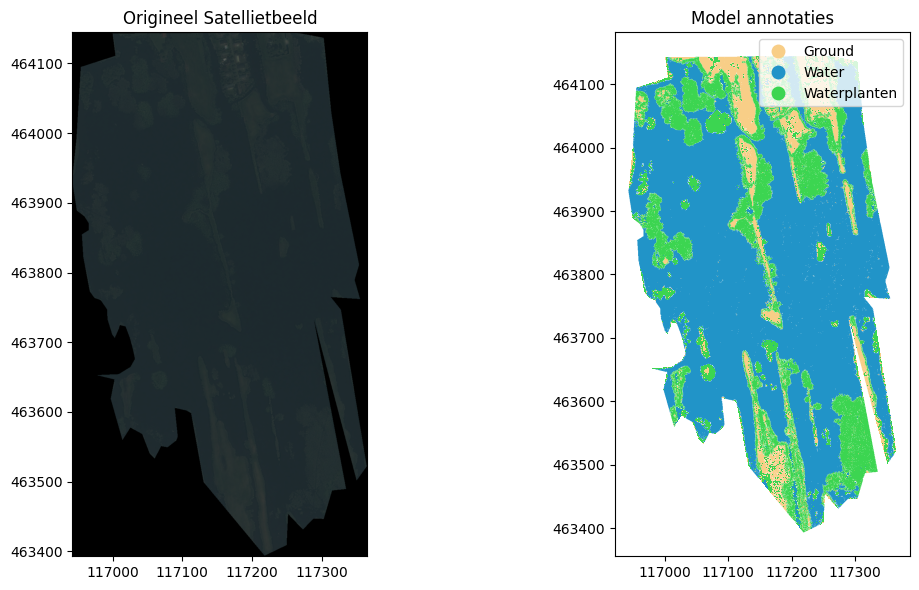

E:/data/nieuwkoopse_plassen_schippersgat/20190523_111841_SV1-04_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif


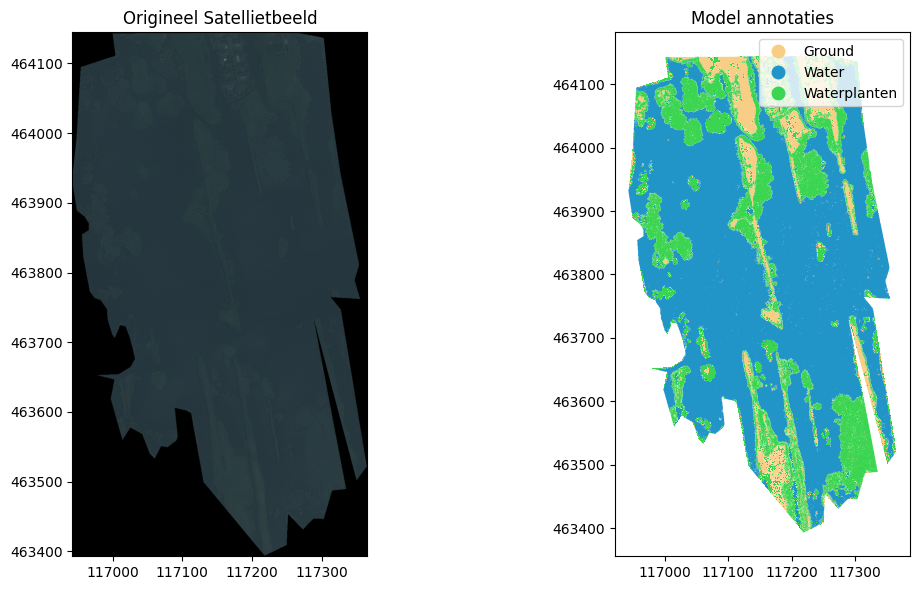

E:/data/nieuwkoopse_plassen_schippersgat/20190629_113712_SV1-02_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif


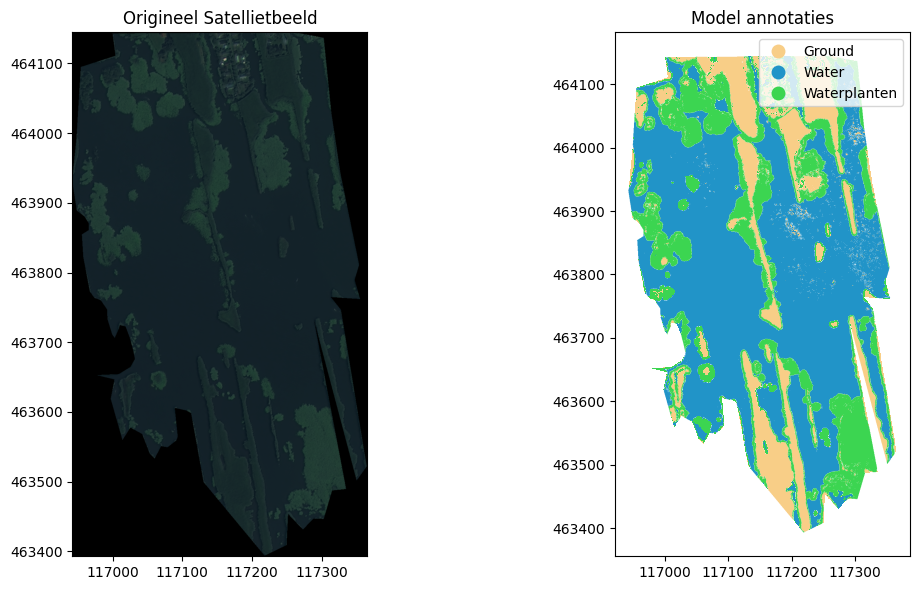

E:/data/nieuwkoopse_plassen_schippersgat/20190826_111247_SV1-01_50cm_RD_11bit_RGBI_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif


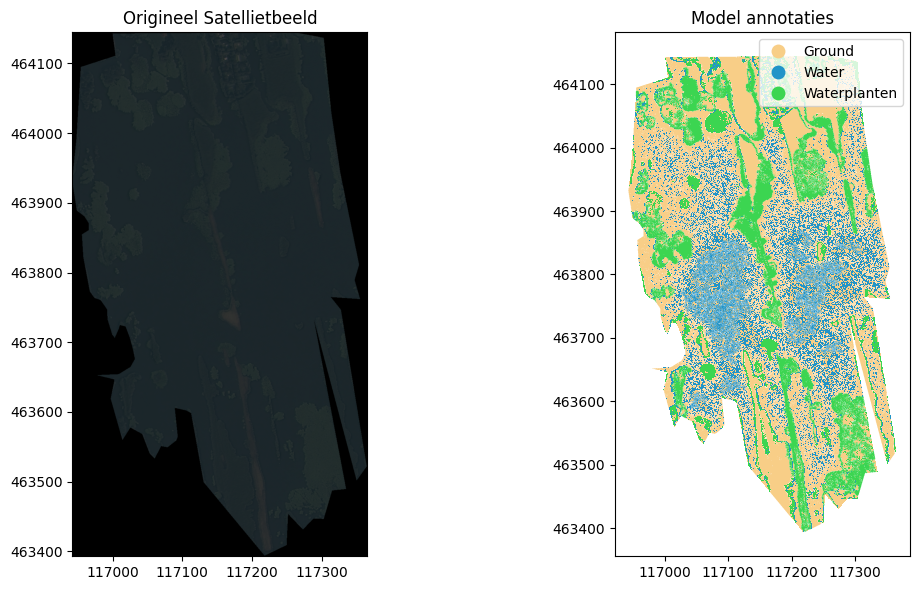

E:/data/nieuwkoopse_plassen_schippersgat/20200812_111845_SV1-02_SV_RD_11bit_RGBI_50cm_VinkeveensePlassen_Schippersgat_cropped_ndwi_re_ndvi.tif


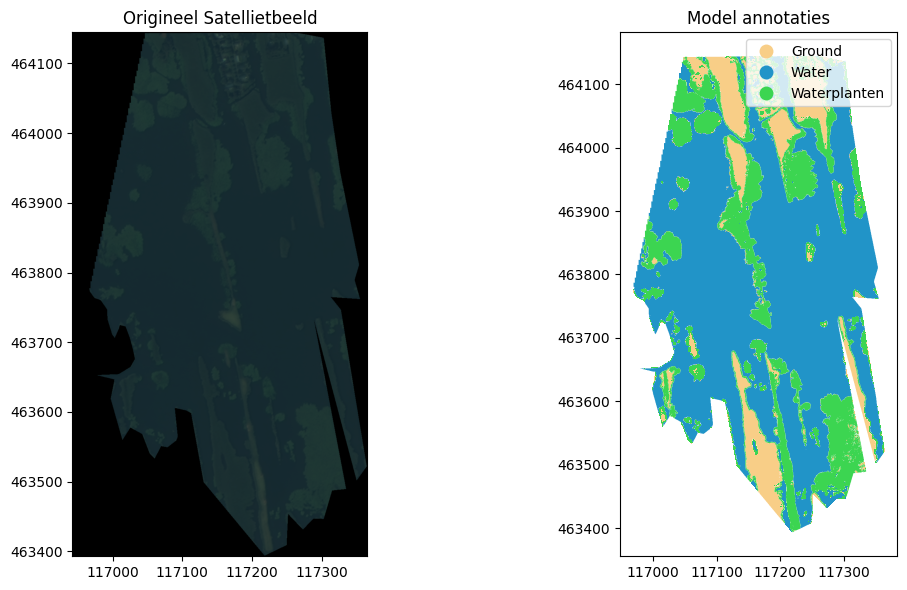

E:/data/nieuwkoopse_plassen_schippersgat/20210617_111532_SV1-04_SV_RD_11bit_RGBI_50cm_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif


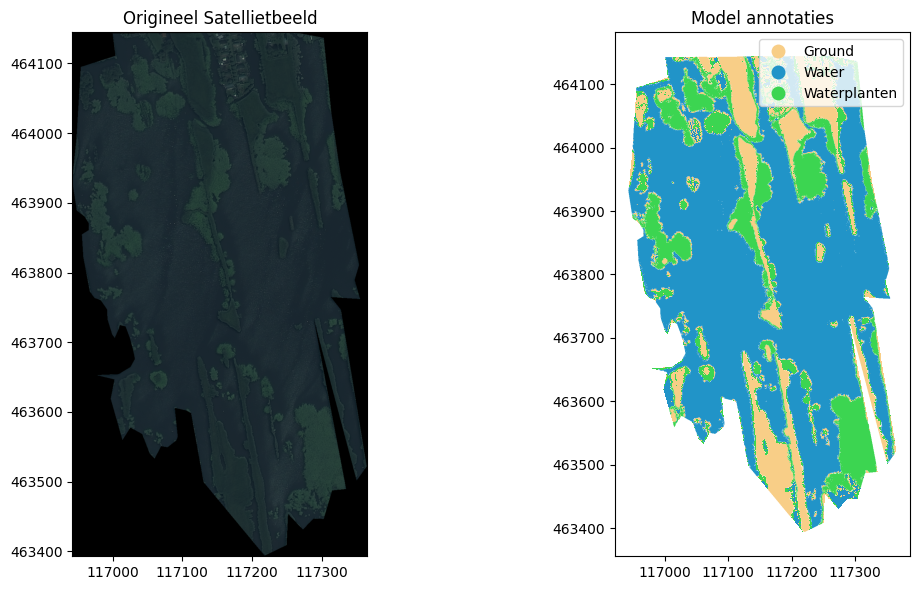

E:/data/nieuwkoopse_plassen_schippersgat/20211129_103911_SV1-01_SV_RD_11bit_RGBI_50cm_Mijdrecht_Schippersgat_cropped_ndwi_re_ndvi.tif


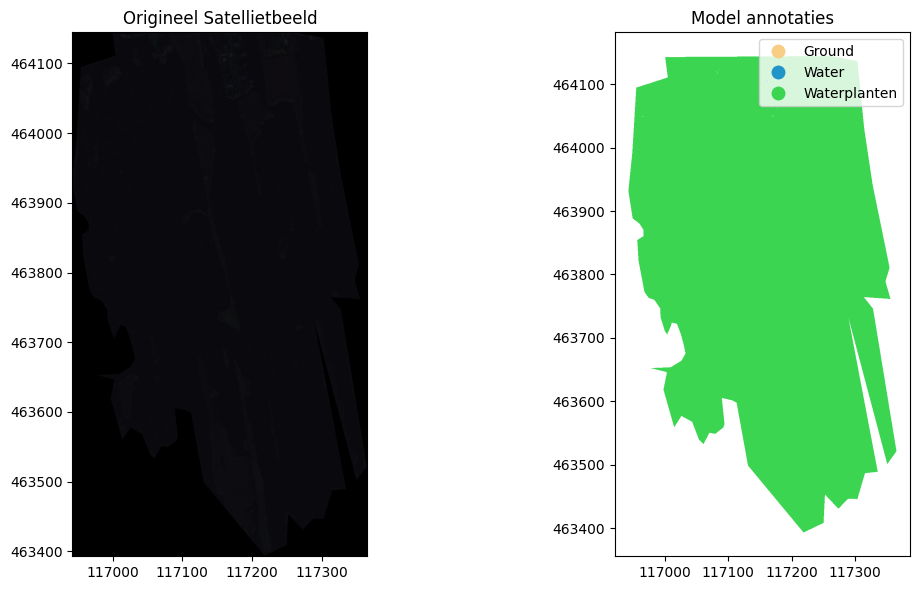

E:/data/nieuwkoopse_plassen_schippersgat/20220705_110002_SV2-01_SV_RD_11bit_RGBI_50cm_Woerden_Schippersgat_cropped_ndwi_re_ndvi.tif


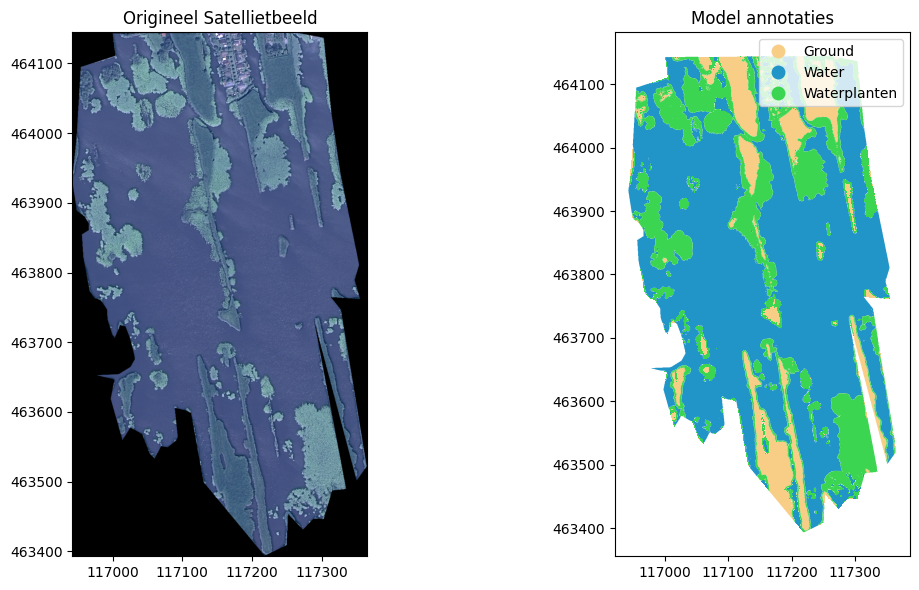

E:/data/nieuwkoopse_plassen_schippersgat/20230603_104624_PNEO-03_1_1_30cm_RD_12bit_RGBNED_Uithoorn_Schippersgat_cropped_ndwi_re_ndvi.tif


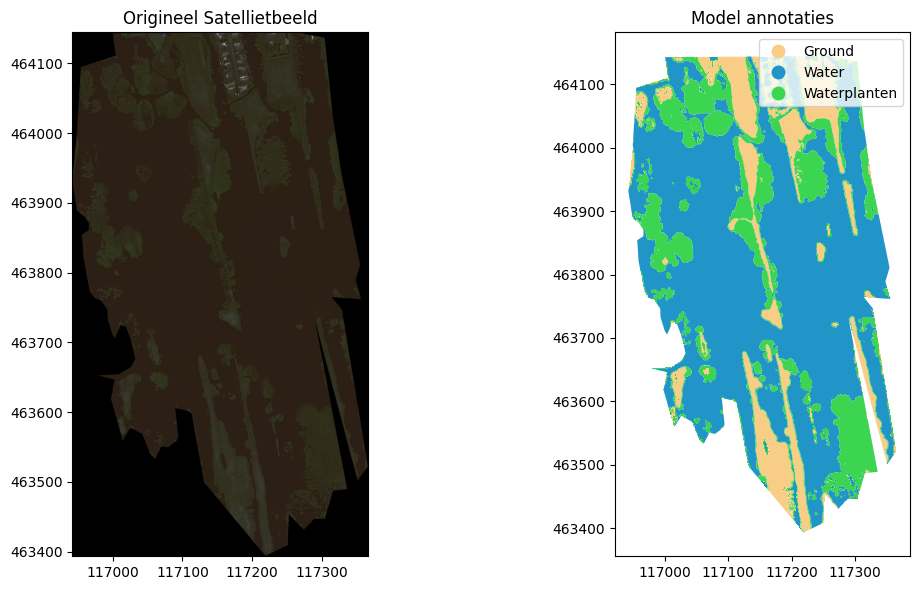

E:/data/nieuwkoopse_plassen_schippersgat/20230905_105231_PNEO-03_1_1_30cm_RD_12bit_RGBNED_Uithoorn_Schippersgat_cropped_ndwi_re_ndvi.tif


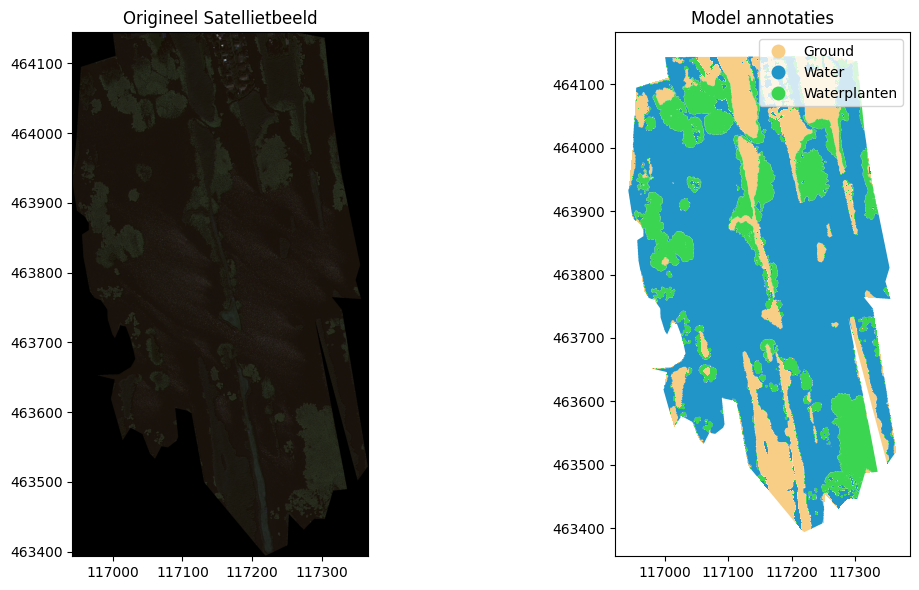

In [6]:
for tif_file in no_clouds_schippergat:
    
        try: 
                tif_file = tif_file.replace("\\","/")
                print(tif_file)
                
                
                # Read the TIF file

                src = rasterio.open(tif_file)

                plot_out_image = (
                        np.clip(src.read()[2::-1], 0, 2200) / 2200
                )  # out_image[2::-1] selects the first three items, reversed


              

                # Plotting
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

                plt.title(tif_file.split("/")[-1].split("_")[0])
                # Plot the TIF file
                show(plot_out_image, ax=ax1, transform=src.transform)
                ax1.set_title('Origineel Satellietbeeld')

                geojson_file = glob.glob("E:/output/schippersgat/"+tif_file.split("/")[-1].split("_")[0]+"*")[0]
                # Read the GeoJSON file
                geojson_data = gpd.read_file(geojson_file)
                geojson_data['color'] = ["Ground",'Water', "Waterplanten"]
                colors = {'blue': '#2194c8', 'brown': '#f8ce87', 'green': '#3cd551'}  # using hex codes
                cmap = ListedColormap([colors['brown'],colors['blue'],colors['green']])

                # Plot the GeoJSON file
                geojson_data.plot(column="color", ax=ax2, legend=True, cmap = cmap)
                ax2.set_title('Model annotaties')

                plt.tight_layout()
                plt.show()
        except Exception as e:
                print(e)